# PART 1: testing the data preparation functions and performing the EDA

First we lead all the modules and libraries we need:

In [1]:
import os
import string
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import nltk
nltk.download('stopwords')

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict
from array import array
from dotenv import load_dotenv
from wordcloud import WordCloud
from collections import Counter

load_dotenv()  # take environment variables from .env

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\auror\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Preparation Functions (`data_prep.py`)


For the EDA, we load the entire JSON document as a dataframe. And we also get the functions `build_terms` and `join_build_terms`.

In [2]:
def build_terms(text):
    """
    Preprocesses the text fields of the document in the corpus (only`title` and `description`) by removing stop words, tokenizing, removing punctuation marks, stemming and [#TODO].

    :param document: (string) text to be processed
    :return text: List of tokens corresponding to the input text after the preprocessing
    """

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))

    text = text.lower()  # Transform to lowercase
    text = text.split(" ")  # Tokenize the text, separating by spaces
    text = [
        word.strip(string.punctuation)
        for word in text
        if word.strip(string.punctuation).isalnum() and word not in stop_words
    ]  # eliminate the stop words [`strip` is to separate exclamation signs from words, e.g. "Hello!"" -> "Hello" + "!"]
    text = [stemmer.stem(word) for word in text]  # perform stemming

    # TODO: add more preprocessing if necessary

    return text

In [14]:
def join_build_terms(strings):
    """
    Builds the terms by concatenating the strings in the given list.

    :param strings: List of string. Texts to be concatenated and processed.
    :return terms: List of string, where each item is a word.
    """
    arg = " ".join(strings)
    return build_terms(arg)

## Exploratory Data Analysis (EDA)

To performa the EDA, we are gonna read the JSON document as a dataframe and perform different operations to the data. Then, we will use the preprocessing functions in `data_prp.py` and other processing techniques to make the necessary plots and compute statistics.

First, we load the dataframe to see the types of each field, and notice what we need to preprocess before using it for the plots and statistics:

In [15]:
import pandas as pd

json_path = os.getenv("DATA_FILE_PATH")

notebook_dir = Path().resolve()
data_path = notebook_dir.parent.parent / "data" / "fashion_products_dataset.json"

data = pd.read_json(data_path)

data[["pid","title","description","brand","category","sub_category","actual_price","discount","selling_price","average_rating","out_of_stock", "product_details","seller"]].head()

,pid,title,description,brand,category,sub_category,actual_price,discount,selling_price,average_rating,out_of_stock,product_details,seller
0,TKPFCZ9EA7H5FYZH,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"2,999",69% off,921,3.9,False,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises
1,TKPFCZ9EJZV2UVRZ,Solid Men Blue Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"1,499",66% off,499,3.9,False,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises
2,TKPFCZ9EHFCY5Z4Y,Solid Men Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"2,999",68% off,931,3.9,False,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises
3,TKPFCZ9ESZZ7YWEF,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"2,999",69% off,911,3.9,False,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises
4,TKPFCZ9EVXKBSUD7,"Solid Women Brown, Grey Track Pants",Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"2,999",68% off,943,3.9,False,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises


### Word Count Distribution for `title` and `description`

We first need to get, for each article in the corpus, the titles and the descriptions and apply the `build_terms` function to exclude stop words and punctuation marks:

In [16]:
titles = data['title'].apply(build_terms)
descriptions = data['description'].apply(build_terms)

titles_dist = titles.apply(len)
descriptions_dist = descriptions.apply(len)

We can get the statistics for the two distributions:

In [17]:
print("Title word count statistics: \n", titles_dist.describe())
print("\nDescription word count statistics: \n", descriptions_dist.describe())

Title word count statistics: 
 count    28080.000000
mean         5.362749
std          1.881615
min          0.000000
25%          5.000000
50%          5.000000
75%          6.000000
max         28.000000
Name: title, dtype: float64

Description word count statistics: 
 count    28080.000000
mean        17.436289
std         24.776142
min          0.000000
25%          0.000000
50%          9.000000
75%         27.000000
max        479.000000
Name: description, dtype: float64


And we plot them:

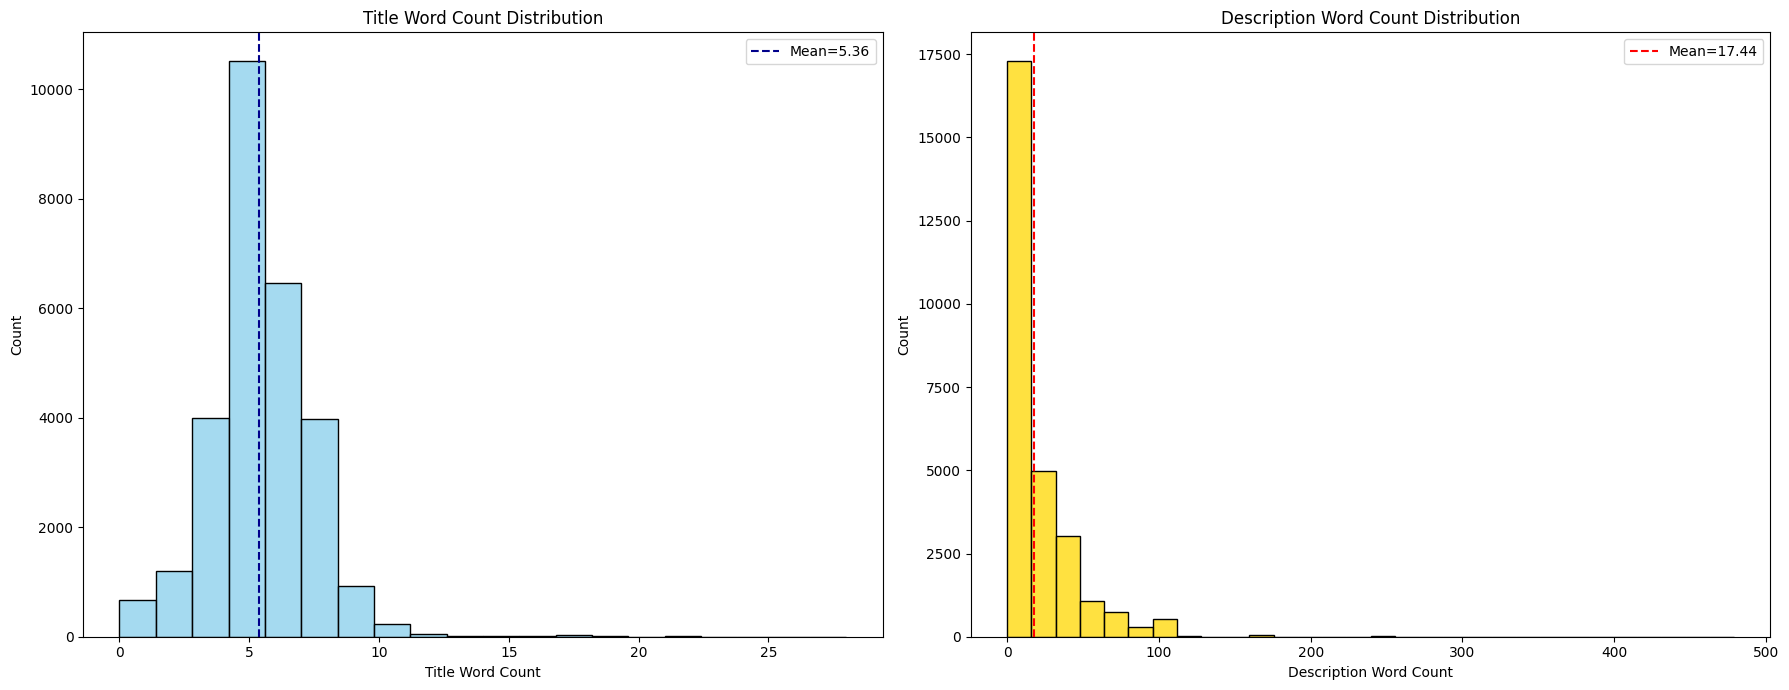

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))  # <-- changed from (2, 1) to (1, 2)

# --- Title word count ---
sns.histplot(data=titles_dist, bins=20, color='skyblue', ax=ax[0])
ax[0].axvline(x=titles_dist.mean(), linestyle='--', color='darkblue', label=f"Mean={titles_dist.mean():.2f}")
ax[0].set_title("Title Word Count Distribution")
ax[0].legend()
ax[0].set_xlabel("Title Word Count")

# --- Description word count ---
sns.histplot(data=descriptions_dist, bins=30, color='gold', ax=ax[1])
ax[1].axvline(x=descriptions_dist.mean(), linestyle='--', color='red', label=f"Mean={descriptions_dist.mean():.2f}")
ax[1].set_title("Description Word Count Distribution")
ax[1].legend()
ax[1].set_xlabel("Description Word Count")

plt.tight_layout()
plt.show()


Text(0.5, 0, 'Description Word Count')

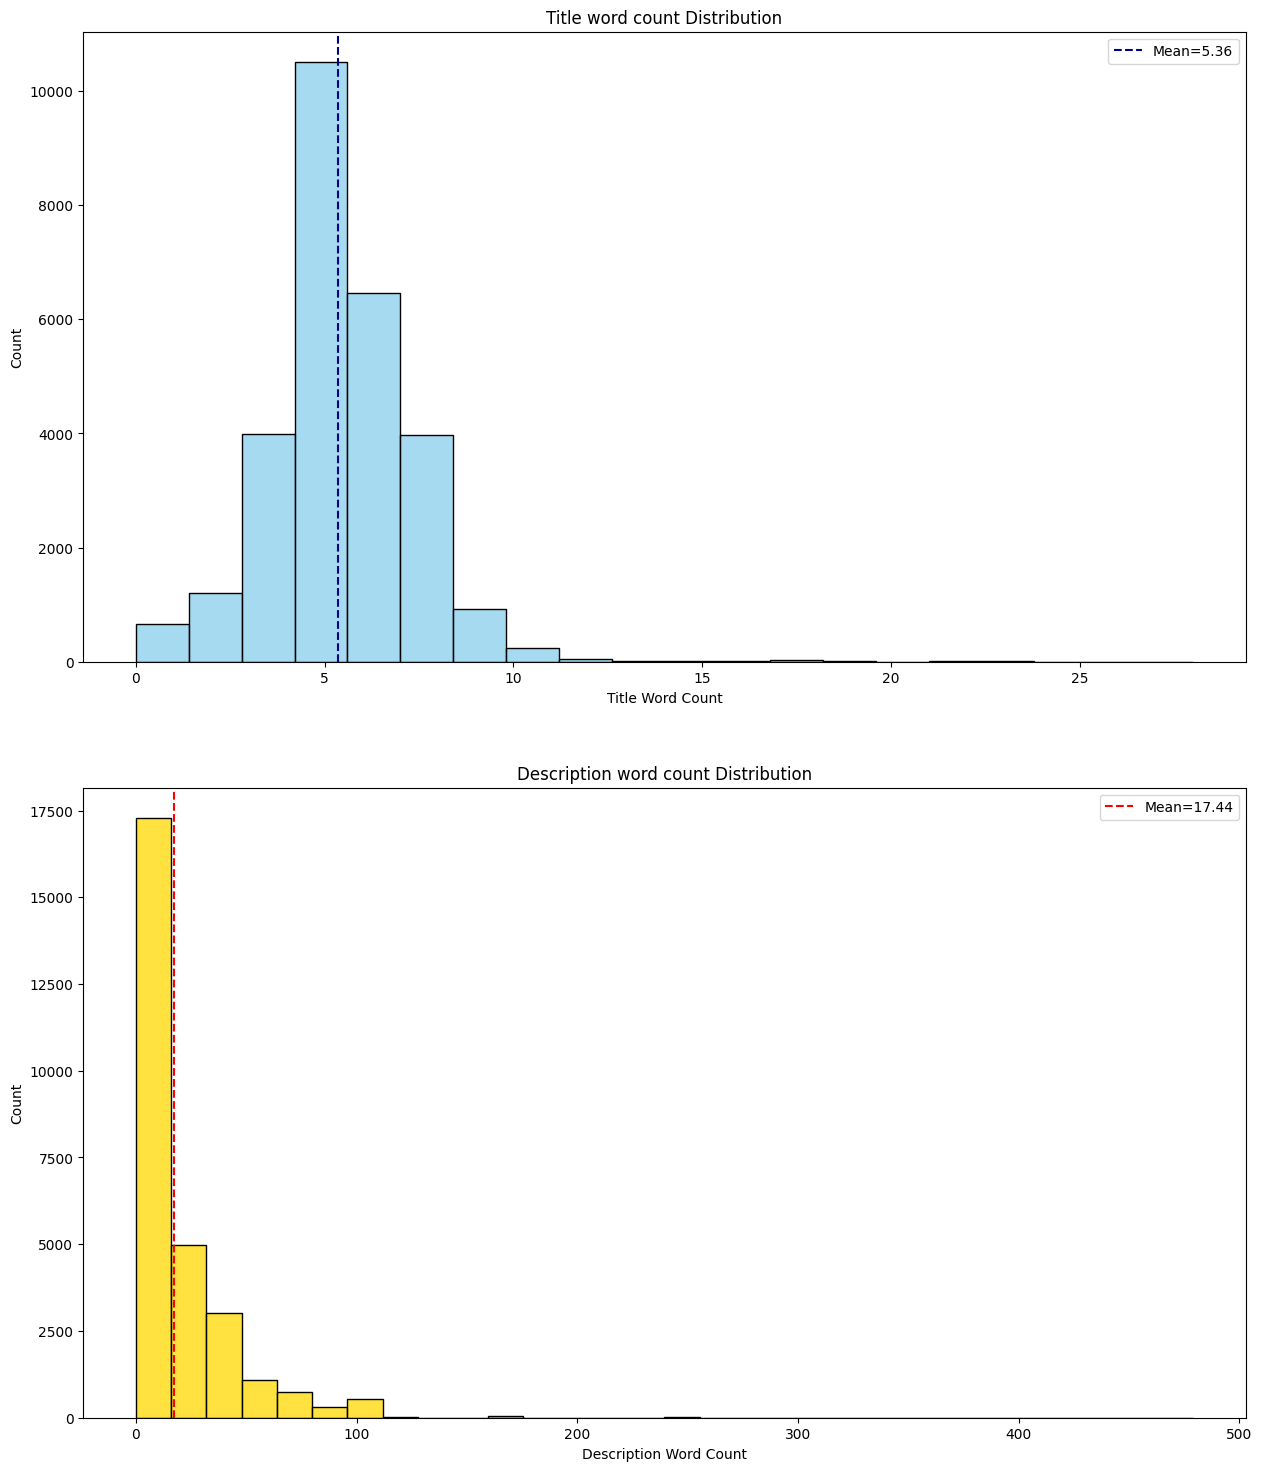

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(15,18))
sns.histplot(data=titles_dist, bins=20, color='skyblue', ax=ax[0])
ax[0].axvline(x=titles_dist.mean(), linestyle='--', color='darkblue', label=f"Mean={titles_dist.mean():.2f}")
ax[0].set_title("Title word count Distribution")
ax[0].legend()
ax[0].set_xlabel("Title Word Count")

sns.histplot(data=descriptions_dist, bins=30, color='gold', ax=ax[1], )
ax[1].axvline(x=descriptions_dist.mean(), linestyle='--', color='red', label=f"Mean={descriptions_dist.mean():.2f}")
ax[1].set_title("Description word count Distribution")
ax[1].legend()
ax[1].set_xlabel("Description Word Count")


### Average Sentence Length

We are gonna now try to see the average sentence length in the descriptions of the articles.

This function gets the average sentence length of a single text (`description`):

In [20]:
import re

def get_avg_sentence_length(text):
    # 1️ Split text per sentence. We're using (., ?, or !) as sentence delimiter.
    sentences = re.split(r'[.!?]+', text)
    sentences = [s.strip() for s in sentences if s.strip()]  # remove empties

    # Split sentences into words
    sentence_lengths = [len(s.split()) for s in sentences]
    try:
        average_length = sum(sentence_lengths) / len(sentence_lengths)
    except:
        return 0
    
    return average_length

And we get the average sentence length for ALL the documents in the corpus:

In [21]:
avg_description_sentence_lengths = data['description'].apply(get_avg_sentence_length)

print("Average sentence length:\n", avg_description_sentence_lengths)
print("\nAverage sentence length frequency count:\n", avg_description_sentence_lengths.value_counts())

Average sentence length:
 0        15.0
1        15.0
2        15.0
3        15.0
4        15.0
         ... 
28075     0.0
28076     0.0
28077     0.0
28078     0.0
28079    14.8
Name: description, Length: 28080, dtype: float64

Average sentence length frequency count:
 description
0.000000     11150
13.000000      643
10.000000      600
8.000000       485
7.000000       476
             ...  
7.833333         1
28.800000        1
33.333333        1
9.285714         1
19.571429        1
Name: count, Length: 435, dtype: int64


We can now plot the distribution of average sentence length:

Text(0.5, 0, 'Description Average Sentence Length')

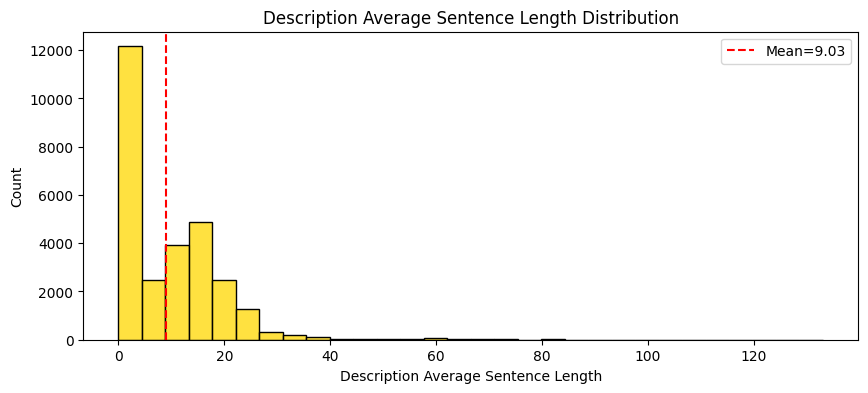

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,4))

sns.histplot(data=avg_description_sentence_lengths, bins=30, color='gold', ax=ax)
ax.axvline(x=avg_description_sentence_lengths.mean(), linestyle='--', color='red', label=f"Mean={avg_description_sentence_lengths.mean():.2f}")
ax.set_title("Description Average Sentence Length Distribution")
ax.legend()
ax.set_xlabel("Description Average Sentence Length")

### Word Dictionary

To construct the dictionary, we want to find all the words in all the documents. For this, we take into account ALL the fields of the documents.

In [23]:
# Get terms for all categories
titles = " ".join(data['title'].astype(str))
descriptions = " ".join(data['description'].astype(str))
brand = " ".join(data['brand'].astype(str))
category = " ".join(data['category'].astype(str))
sub_category = " ".join(data['sub_category'].astype(str))
seller = " ".join(data['seller'].astype(str))
product_details = " ".join(data['product_details'].apply(lambda x: " ".join(str(v) for k in x for v in k.values())).astype(str))

We make use of our function `join_build_terms` for getting the terms in one or more given strings, to construct the dictionary of words (`words`):

In [24]:
words = join_build_terms([titles, descriptions, brand, category, sub_category, seller, product_details])

For the dictionary, we do not want repeated words, so we construct the `unique_words` list by using a `set`. This dictionary has the following number of words:

In [25]:
unique_words = list(set(words))
len(unique_words)

16829

### Word Cloud

To compute the word cloud, we will use the previously calculated list of `words`. We just need to find the amount of times each word is repeated:

1. ('neck', 41421)
2. ('cotton', 33865)
3. ('wear', 31254)
4. ('cloth', 31154)
5. ('accessori', 29204)
6. ('round', 28444)
7. ('regular', 27175)
8. ('1', 26746)
9. ('wash', 26063)
10. ('women', 25870)
11. ('sleev', 25749)
12. ('men', 25217)
13. ('print', 23404)
14. ('solid', 22875)
15. ('shirt', 22371)
16. ('western', 19155)
17. ('machin', 17720)
18. ('topwear', 15315)
19. ('blend', 15274)
20. ('fit', 14764)


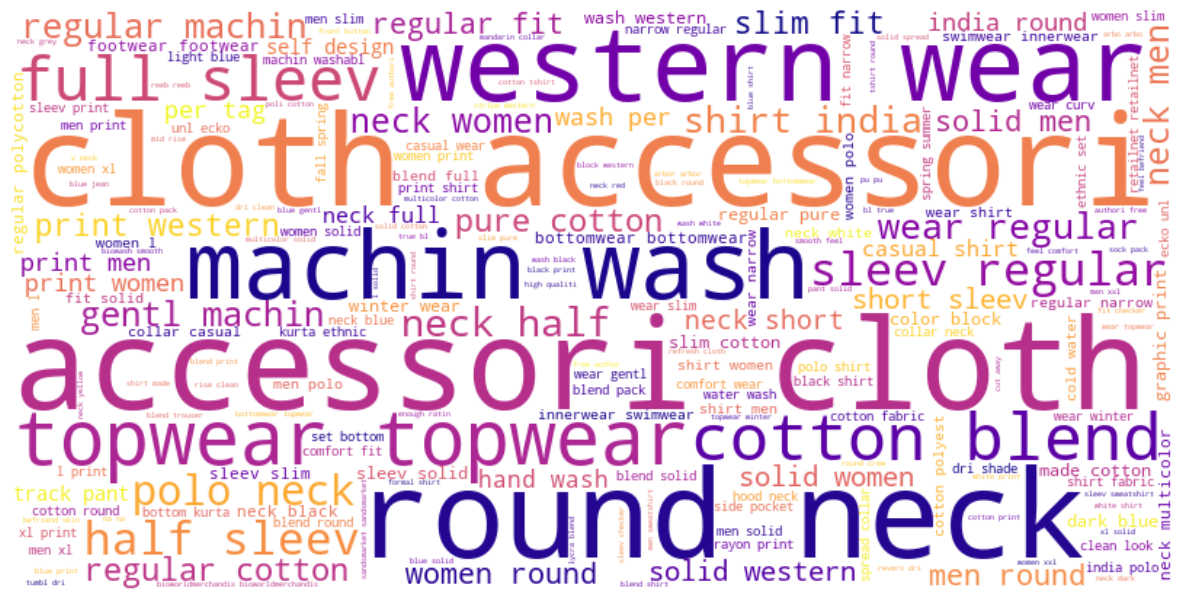

In [26]:
# Count word frequencies
word_counts = Counter(words)
TOP = 20
# Show top 3 most common words
top_words = word_counts.most_common(TOP)
for idx in range(TOP):
    print(f"{idx+1}. {top_words[idx]}")

# Join words into a single string (WordCloud expects a string)
text = " ".join(words)

# Create a WordCloud object
wc = WordCloud(width=800, height=400, background_color="white",
               colormap="plasma",  # try: 'viridis', 'cool', 'magma', etc.
               contour_width=1,
               contour_color='black').generate(text)

plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


### Out of Stock Distribution

We first load the data:

In [27]:
out_of_stock_dist = data['out_of_stock']

To get the distribution, we only need to see how many products are in and out of stock:

In [28]:
out_of_stock_dist.value_counts()

out_of_stock
False    26436
True      1644
Name: count, dtype: int64

We plot it in a pie chart:

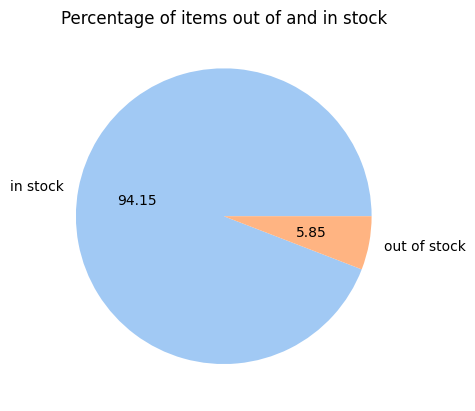

In [29]:
colors = sns.color_palette("pastel")[0:len(out_of_stock_dist)]

plt.figure()
plt.pie(x=out_of_stock_dist.value_counts(), labels=["in stock", "out of stock"], colors=colors, autopct='%1.2f')
plt.title("Percentage of items out of and in stock")
plt.show()

### Document Rankings

To get the rankings, we first need to format the numerical values in the dataframe:

In [30]:
data['average_rating'] = data['average_rating'].replace('', '0').astype(float)  # Replace null values
data['actual_price'] = data['actual_price'].replace(r'[^\d.]', '', regex=True).replace('', '0').astype(float)   # Replace commas and null values
data['selling_price'] = data['selling_price'].replace(r'[^\d.]', '', regex=True).replace('', '0').astype(float) # Replace commas and null values
data['discount'] = data['discount'].replace(r'[^\d.]', '', regex=True).replace('', '0').astype(float)/100   # Replace the symbol and letters and compute percentage from 0-1

display(data.head(5))

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,0.69,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921.0,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,1499.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,0.66,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499.0,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,0.68,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931.0,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,0.69,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911.0,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,0.68,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943.0,Bottomwear,"Solid Women Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


The following code cell allows gets the fields `pid`, `title`, `average_rating`, and `url` and sorts the dataframe by `average_rating` and then `pid` in descending order (we see the ranking of better ranked documents).

The values can be changed to see different rankings:

In [31]:
rating_rank = data[['pid','title','average_rating','url']].sort_values(by=['average_rating','pid'], ascending=False)
display(rating_rank[rating_rank['average_rating'] >= 4.5]) # filter to show only documents with rating equal or greater to 4.5

,pid,title,average_rating,url
10262,WSCFNMGJQS9JCDSB,Self Design Women Waistcoat,5.0,https://www.flipkart.com/true-blue-self-design...
13251,VESFSJ92YXMAJZFX,Sheny Women Vest,5.0,https://www.flipkart.com/sheny-men-vest/p/itmf...
8394,VESFN9F3WNWECUP5,VIP Women Vest (Pack of 8),5.0,https://www.flipkart.com/vip-men-vest/p/itm733...
8392,VESFN9F3BZYWXMFG,VIP Men Vest (Pack of 8),5.0,https://www.flipkart.com/vip-men-vest/p/itmb8e...
8402,VESFN9F39XJEQYJV,VIP Men Vest (Pack of 8),5.0,https://www.flipkart.com/vip-men-vest/p/itm69d...
...,...,...,...,...
10135,CAPE7V4Z8TQFWP9Y,Self Design Skull Cap,4.5,https://www.flipkart.com/graceway-self-design-...
8828,BRFFZ9RECVZFXUVN,Women Brief (Pack of 2),4.5,https://www.flipkart.com/juari-gentleman-men-b...
8825,BRFFYQJAHQMPSUTG,Women Brief,4.5,https://www.flipkart.com/juari-gentleman-men-b...
8826,BRFFYQJAFQFUGHVD,Women Brief,4.5,https://www.flipkart.com/juari-gentleman-men-b...


The following code cell creates the ranking regarding `actual_price`, `discount`, and `selling_price`. With different values in the "by=" argument of the `sort_values`, we can sort regarding different data:

In [36]:
rating_rank = data[['pid','title','actual_price','discount','selling_price','url']].sort_values(by=['actual_price','discount'], ascending=False)
display(rating_rank.head(TOP))

,pid,title,actual_price,discount,selling_price,url
10272,SUIFNNPF3W8GEHAB,3 Piece Solid Women Suit,12999.0,0.60,5199.0,https://www.flipkart.com/true-blue-3-piece-sol...
10287,SUIFPDS2DEZNSKTH,2 Piece Self Design Women Suit,12999.0,0.60,5199.0,https://www.flipkart.com/true-blue-2-piece-sel...
10315,SUIFNMK2FQDWYTUZ,2 Piece Solid Men Suit,12999.0,0.60,5199.0,https://www.flipkart.com/true-blue-2-piece-sol...
25423,JCKFQF5K72AT2JDC,Full Sleeve Solid Women Casual Jacket,12999.0,0.50,6499.0,https://www.flipkart.com/puma-full-sleeve-soli...
25815,JCKFQF5KMJJ349H8,Full Sleeve Solid Women Casual Jacket,12999.0,0.40,7799.0,https://www.flipkart.com/puma-full-sleeve-soli...
26089,SWSFUMFGQFKVZGYH,Full Sleeve Printed Men Sweatshirt,12999.0,0.40,7799.0,https://www.flipkart.com/puma-full-sleeve-prin...
6895,JEAF8S4GWU5YKQTF,Skinny Men Blue Jeans,12990.0,0.40,7794.0,https://www.flipkart.com/gas-skinny-men-blue-j...
25569,JCKFW8EFUXMSBHMZ,Full Sleeve Solid Men Padded Jacket,10999.0,0.45,6049.0,https://www.flipkart.com/puma-full-sleeve-soli...
6870,JCKF8SWBNSGY5TPX,Full Sleeve Self Design Women Casual Jacket,10990.0,0.52,5188.0,https://www.flipkart.com/gas-full-sleeve-self-...
6901,JEAF65G3MZYG3BQM,Maxx Regular Men Black Jeans,10990.0,0.39,6692.0,https://www.flipkart.com/gas-maxx-regular-men-...


### Top Brands and Sellers

To get the top sellers, we can count how many times the different sellers appear and rank them in descending order of the sellers that appear the most:

In [36]:
seller_info = pd.DataFrame(data['seller'].value_counts())
display(seller_info.head(TOP))

,count
seller,
,1643
RetailNet,1411
SandSMarketing,887
BioworldMerchandising,842
ARBOR,783
Keoti,660
AFFGARMENTS,587
Black Beatle,548
AMALGUS ENTERPRISE,477


We can do the same with the brands:

In [37]:
brand_info = pd.DataFrame(data['brand'].value_counts())
display(brand_info.head(TOP))

,count
brand,
,2009
ECKO Unl,951
Free Authori,860
ARBO,806
REEB,802
Pu,798
True Bl,793
Keo,660
Amp,585
